In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

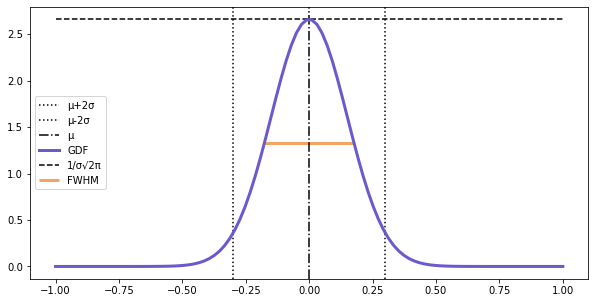

In [78]:
fig = plt.figure(figsize=(10, 5))
plt.hlines(y=1/sigma/np.sqrt(2*np.pi),linestyles='--',xmin=-1, xmax=1, color='k',label='1/\u03C3√2π')
plt.axvline(x=2*sigma+mu,linestyle=':', color='k',label='μ+2\u03C3')
plt.axvline(x=-2*sigma+mu,linestyle=':', color='k',label='μ-2\u03C3')
plt.axvline(x=mu,linestyle='-.',color='k',label='μ')
plt.hlines(y=np.max(P)/2,linestyles='-',lw=3,xmin=-2.35*sigma/2, xmax=2.35*sigma/2, color='sandybrown',label='FWHM')
plt.plot(x,P,label='GDF',lw=3,color='slateblue')
plt.legend(loc='center left')
plt.show()

## (a)

Define the prior functions

In [245]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-((H-mu)/sigma)**2/2)/np.sqrt(2*np.pi)/sigma

second_prior = np.vectorize(gaussian_prior)

def third_prior(H):
    if  H > 1 or H < 0:
        return 0
    return 1/np.pi/(np.sqrt((H)*(1-H)))

third_prior = np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

There is a continuum of possibilities for the value of H. If H was a single value we could say if H>1... without vectorizing. but in our case we have many Hs so without using np.vectorize we would get an error. Although we can get the same results without np.vectorize if ...

In [5]:
def gaussian_prior_w(H):
    HH=[]
    for i in range(len(H)):
        if  H[i] > 1 or H[i] < 0:
            HH.append(0)
        else:
            sigma = 0.03
            mu = 0.5
            HH.append(int(np.exp(-((H[i]-mu)/sigma)**2/2)/np.sqrt(2*np.pi)/sigma))
    return np.array(HH)

Checking if they are the same or not...

In [6]:
HH = np.linspace(-1, 1, 100, dtype=np.float128)
a,b,c = gaussian_prior_w(HH),second_prior(HH),0
for i in range(len(HH)): 
    if a[i]==b[i]: c+=1
if c==len(a): print('They are the same.')

They are the same.


## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [222]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

In [231]:
h, hh = first_prior(H), second_prior(H)
hhh = third_prior(H)
hhh[0],hhh[len(hhh)-1]=hhh[1],hhh[1]

In [236]:
def normalize(Q):
    norm, dif = [], abs(np.max(Q)-np.min(Q))
    for i in Q: norm.append((i-np.min(Q))/dif)
    return norm

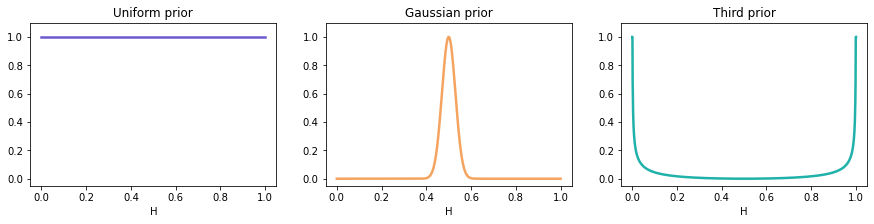

In [237]:
fig = plt.figure(figsize=(15, 3))
name = ['Uniform prior','Gaussian prior','Third prior']
for i,ax,name,c in zip([h,normalize(hh),normalize(hhh)],range(1,4),name,['slateblue','sandybrown','lightseagreen']):
    ax =  fig.add_subplot(1, 3, ax )
    plt.plot(H,i,color=c,lw=2.5)
    plt.title(name)
    ax.set_xlabel('H')
    plt.gca().set_ylim(-0.05,1.1)
plt.show()
    

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

In [178]:
H = np.linspace(0, 1, 1000, dtype=np.float128)
H[1]

0.0010010010010010009923

In [179]:
HH = np.linspace(0, 1, 1000,dtype=np.float32)
HH[1]

0.001001001

As calculations are performed the results will be rounded so that they would fit into the space in the memory. float128 is 128 big memory, its usually the same as doublelong. float32 occupies less units in memory therfore as we can see it has less decimales. 

If we used np.float32 results will be rounded to zero and we would have an stright line at zero.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [54]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [252]:
H = np.linspace(0, 1, 1000, dtype=np.longdouble)
def posterior(H,D):
    ones  = (D == 1).sum()
    ones.astype('longdouble')
    zeros = (D == 0).sum()
    zeros.astype('longdouble')
    return H**ones*(1-H)**zeros

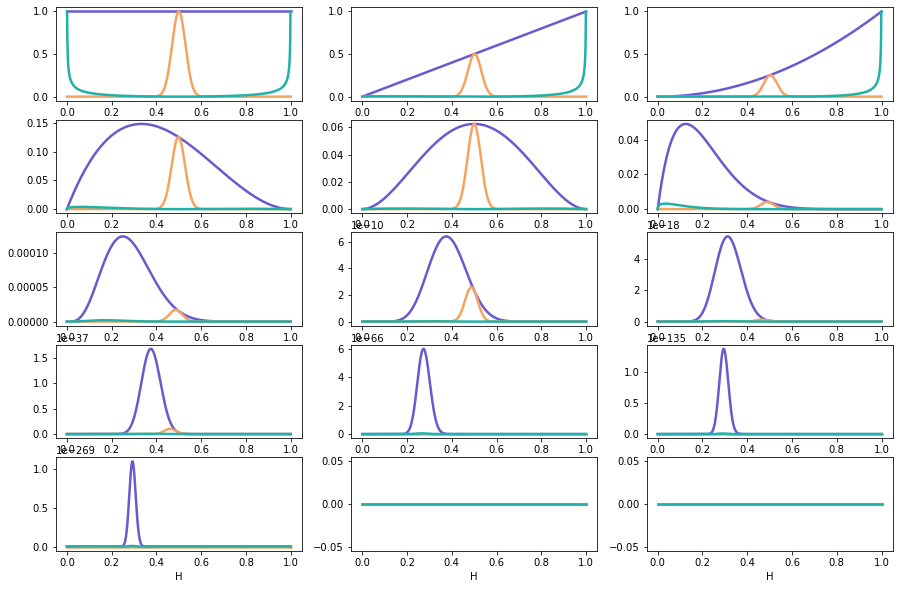

In [273]:
fig = plt.figure(figsize=(15, 10))

for i,ax in zip(range(len(data)),range(1,16)):
    ax =  fig.add_subplot(5,3, ax )
    plt.plot(H,posterior(H,data[i])*first_prior(H),color='slateblue',lw=2.5)
    ax.set_xlabel('H')

for i,ax in zip(range(len(data)),range(1,16)):
    ax =  fig.add_subplot(5,3, ax )
    p2 = np.array(normalize(hh))
    p2.astype('longdouble')
    plt.plot(H,posterior(H,data[i])*p2 ,color='sandybrown',lw=2.5)
    ax.set_xlabel('H')

for i,ax in zip(range(len(data)),range(1,16)):
    ax =  fig.add_subplot(5,3, ax )
    p3 = np.array(normalize(hhh))
    p3.astype('longdouble')
    plt.plot(H,posterior(H,data[i])*p3,color='lightseagreen',lw=2.5)
    ax.set_xlabel('H')

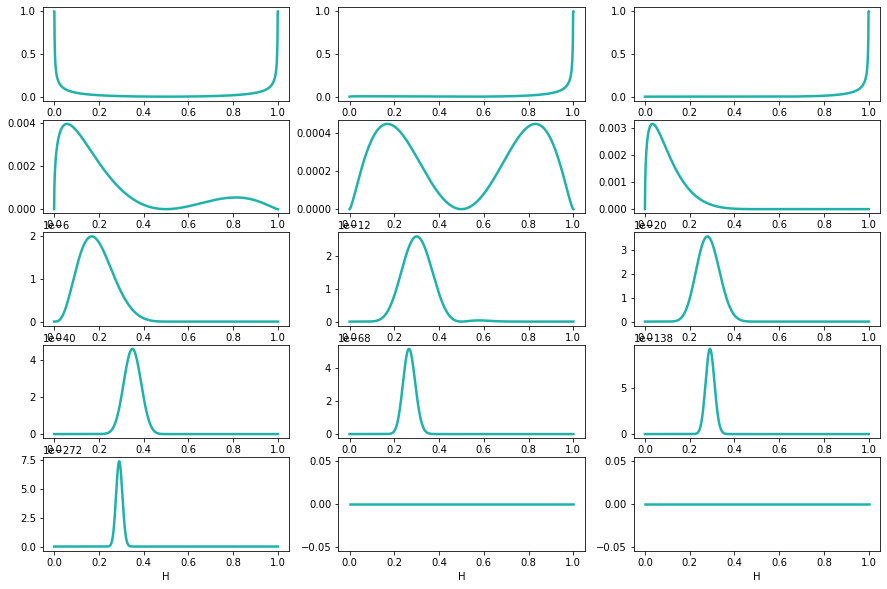

In [270]:
fig = plt.figure(figsize=(15, 10))
for i,ax in zip(range(len(data)),range(1,16)):
    ax =  fig.add_subplot(5,3, ax )
    p3 = np.array(normalize(hhh))
    p3.astype('longdouble')
    plt.plot(H,posterior(H,data[i])*p3,color='lightseagreen',lw=2.5)
    ax.set_xlabel('H')

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [91]:
def raw_moments(x):
    x2,x3,x4 = np.zeros(len(x)),np.zeros(len(x)),np.zeros(len(x))
    for t in range(len(x)): x2[t],x3[t],x4[t] = x[t]**2 ,x[t]**3 ,x[t]**4      
    df = pd.DataFrame(zip([np.mean(x)],[np.mean(x2)],[np.mean(x3)],[np.mean(x4)]),
            columns= ["m'\N{SUBSCRIPT ONE}","m'\N{SUBSCRIPT TWO}" ,"m'\N{SUBSCRIPT THREE}", "m'\N{SUBSCRIPT FOUR}"],index=['Raw moments'] )
    display(df)
    return x,x2,x3,x4

In [92]:
x = np.random.poisson(1,10000)
_,_,_,_ = raw_moments(x)

,m'₁,m'₂,m'₃,m'₄
Raw moments,0.9957,2.0177,5.1063,15.4157


In [70]:
def raw_moments_n(x,n):
    xn = np.zeros(len(x))
    for t in range(len(x)): xn[t] = x[t]**n
    print('The nth moment is {}.'.format(np.mean(xn)))
    return np.mean(xn)
raw_moments_n(x,10)

The nth moment is 34034.62.


34034.62

## (b)

Write a function to calculate central moments of a given distribution

In [111]:
def central_moments(x):
    x1,x2,x3,x4 = np.zeros(len(x)),np.zeros(len(x)),np.zeros(len(x)),np.zeros(len(x))
    mu = np.mean(x)
    for t in range(len(x)): x1[t],x2[t],x3[t],x4[t] = (x[t]-np.mean(x)),(x[t]-np.mean(x))**2, (x[t]-np.mean(x))**3 ,(x[t]-np.mean(x))**4     
    df = pd.DataFrame(zip([np.mean(x1)],[np.mean(x2)],[np.mean(x3)],[np.mean(x4)]),
            columns= ['m\N{SUBSCRIPT ONE}','m\N{SUBSCRIPT TWO}' ,'m\N{SUBSCRIPT THREE}' , 'm\N{SUBSCRIPT FOUR}'],index=['Central moments'] )
    display(df)
    return x,x2,x3,x4

In [112]:
x = np.random.poisson(1,10000)
_,_,_,_ = central_moments(x)

,m₁,m₂,m₃,m₄
Central moments,1.229239e-16,0.985888,0.939952,3.648389


In [73]:
def central_moments_n(x,n):
    xn = np.zeros(len(x))
    for t in range(len(x)): xn[t] = (x[t]-np.mean(x))**n
    print('The nth central moment is {}.'.format(np.mean(xn)))
    return np.mean(xn)
central_moments_n(x,10)

The nth central moment is 1813.02.


1813.02

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [113]:
#for binomial
x_binomial = np.random.binomial(n=30, p=0.7, size=1000)
_,_,_,_ = raw_moments(x_binomial)
_,_,_,_ = central_moments(x_binomial)

,m'₁,m'₂,m'₃,m'₄
Raw moments,21.096,451.26,9781.104,214688.58


,m₁,m₂,m₃,m₄
Central moments,-8.526513e-17,6.218784,-1.059895,110.643041


In [114]:
#for gaussian
x_gaussian = np.random.normal(loc=2.1, scale=0.3, size=1000)
_,_,_,_ = raw_moments(x_gaussian)
_,_,_,_ = central_moments(x_gaussian)

,m'₁,m'₂,m'₃,m'₄
Raw moments,2.124978,4.602188,10.151948,22.796234


,m₁,m₂,m₃,m₄
Central moments,5.195844e-17,0.086656,0.004115,0.023442


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [101]:
from scipy import stats

In [115]:
#for binomial
df = pd.DataFrame(zip([stats.moment(x_binomial,1)],[stats.moment(x_binomial,2)],[stats.moment(x_binomial,3)],[stats.moment(x_binomial,4)]),
        columns= [' ',' ' ,' ' , ' '],index=['Scipy moments'] )
display(df)

,,,,
Scipy moments,0.0,6.218784,-1.059895,110.643041


In [116]:
#for gaussian
df = pd.DataFrame(zip([stats.moment(x_gaussian,1)],[stats.moment(x_gaussian,2)],[stats.moment(x_gaussian,3)],[stats.moment(x_gaussian,4)]),
        columns= [' ',' ' ,' ' , ' '],index=['Scipy moments'] )
display(df)

,,,,
Scipy moments,0.0,0.086656,0.004115,0.023442


Its central moments.

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [275]:
from pandas import DataFrame, read_csv

In [279]:
path = '/Users/apple/Documents/SBU/Mine/data.txt'
df = pd.read_csv(path, delimiter = "\t")
df.head(10)

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
5,45.0,218.0
6,52.5,207.0
7,60.0,235.0
8,67.5,260.0
9,75.0,218.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [293]:
df['total decays'] = np.sum(df['number of events'])/df['# time passed']
df['ave decays'] = np.mean(df['number of events'])/df['# time passed']
df.to_csv('new_data.txt')  

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

In [298]:
df['number of events'].unique()

array([232., 240., 245., 226., 223., 218., 207., 235., 260., 259., 269.,
       229., 246., 234., 213., 230., 237., 242., 238., 249., 202., 244.,
       215., 273., 236., 248., 224., 256., 243., 222., 253., 257., 241.,
       228., 193., 239., 250., 214., 262., 233., 212., 221., 231., 255.,
       251., 216., 217., 209., 247., 220., 265., 263., 225., 219., 266.,
       252., 275., 261., 227., 267., 258., 203., 271., 276., 264., 254.,
       205., 172., 211., 208., 272., 268., 210., 199., 270., 204., 192.,
       197., 198., 200., 274., 279., 278., 298., 297., 201., 292., 206.,
       286., 194., 293.])

In [296]:
import math
data = [np.random.choice(df['number of events'], size=(i)) for i in range(4)] 
data.extend([np.random.choice(df['number of events'], size=(2**i)) for i in range(2, 13)])
H = np.linspace(0, 1, 1000, dtype=np.longdouble)
def posterior(H,D):

    return lam**H*np.exp(-lam)/math.factorial(H)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.